In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.utils import shuffle

from sklearn.mixture import GaussianMixture
# !pip install wordcloud
from wordcloud import WordCloud

# Task 1: PCA & TSNE

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
diagnosis_vals= {'B':0, 'M': 1}
df['diagnosis']=df['diagnosis'].map(diagnosis_vals)

x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

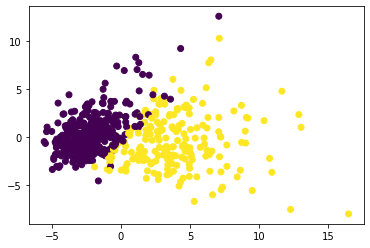

In [4]:
#pca
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)

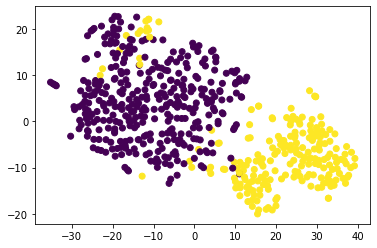

In [5]:
#tnse
ts = TSNE(n_components=2, init="pca")
x_tsne = ts.fit_transform(x_scaled)

plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)

# Task 2: Cluster Analysis

In [6]:
picture = io.imread("picture.jpg")

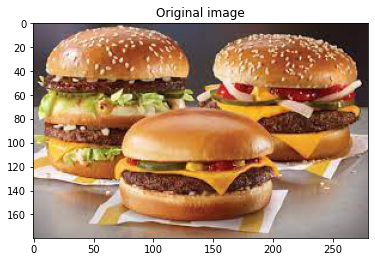

In [7]:
n_colors = 64

w, h, d = original_shape = tuple(picture.shape)

assert d == 3

image_array = np.reshape(picture, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)


plt.title("Original image")
plt.imshow(picture)

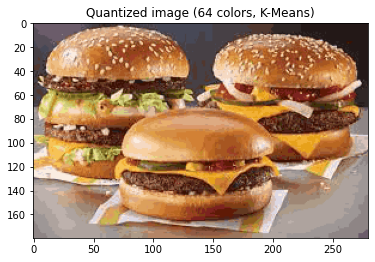

In [8]:
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

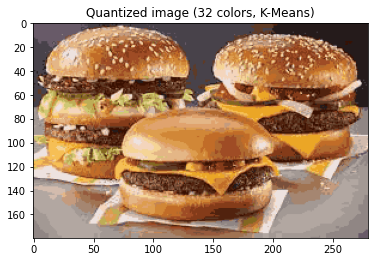

In [9]:
n_colors = 32

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

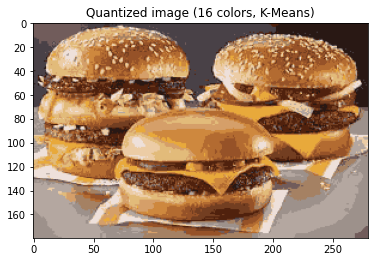

In [10]:
n_colors = 16

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

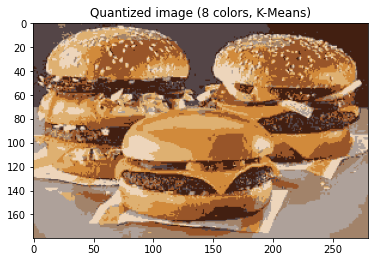

In [11]:
n_colors = 8

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_4644/3581483354.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  x1 = np.random.multivariate_normal(m1, c1, dots_amount)


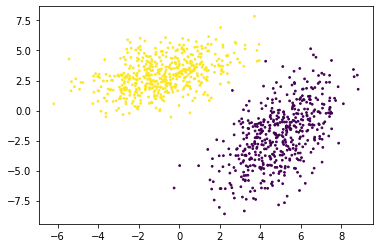

In [12]:
# generating data
dots_amount = 500
m1 = [5, -2]
c1 = [[3, 7], [-1, 1]]
x1 = np.random.multivariate_normal(m1, c1, dots_amount)

m2 = [-1, 3]
c2 = [[3, 1], [1, 2]]
x2 = np.random.multivariate_normal(m2, c2, dots_amount)


X = np.concatenate([x1, x2])
Y = np.array([0] * dots_amount + [1] * dots_amount)
X, Y = shuffle(X, Y)
plt.scatter(X[:, 0], X[:, 1], s=3, c=Y)

In [13]:
GM = GaussianMixture(n_components=2, covariance_type='full')
GM.fit(X)


print(f'means:\n{GM.means_}\n')
print(f'covariances:\n{GM.covariances_}\n')
print(f'weights:\n{GM.weights_}\n')


means:
[[-0.8178822   2.97957066]
 [ 4.92642127 -2.09086861]]

covariances:
[[[3.16744381 1.05328021]
  [1.05328021 1.98454653]]

 [[2.17017389 2.10975587]
  [2.10975587 6.34587474]]]

weights:
[0.50183226 0.49816774]



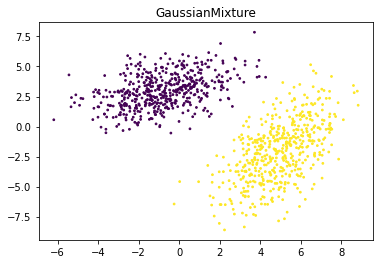

In [14]:
labels = GM.predict(X)
plt.title('GaussianMixture')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=3)

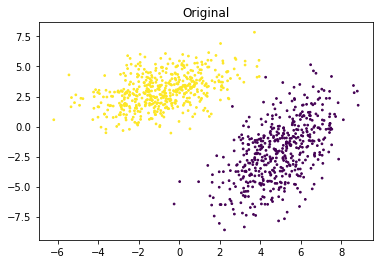

In [15]:
plt.title('Original')
plt.scatter(X[:, 0], X[:, 1], c=Y, s=3)

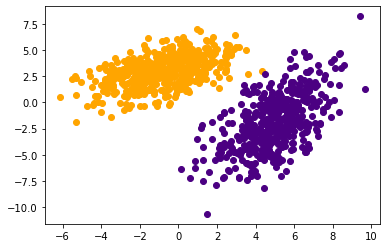

In [16]:
x1_new = np.random.multivariate_normal(GM.means_[0], GM.covariances_[0], dots_amount)
x2_new = np.random.multivariate_normal(GM.means_[1], GM.covariances_[1], dots_amount)

plt.scatter(x1_new[:, 0], x1_new[:, 1], color='orange')
plt.scatter(x2_new[:, 0], x2_new[:, 1], color='indigo')

# Task 3: Wordcloud

In [17]:
df_task3 = pd.read_csv('Reviews.csv')
df_task3.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,4412,B003SWCZG4,A1LE05AN2Q8YBQ,Ken McGlothlen,2,2,4,1299628800,Actually pretty good.,Ghirardelli isn't the finest chocolate you can...
1,4413,B003SWCZG4,A2WJH1QD0M9X51,Heather Ferguson,0,0,5,1351036800,Chocolate is good for you!! Eat more.,Many reports are coming out about how chocolat...
2,4414,B003SWCZG4,A1GQAKL9CGQLP1,L. M. Keefer,0,0,5,1330041600,Great Dark Chocolate for Yourself or for Guests!,I love this sampler of Ghiradelli Chocolate In...
3,4415,B0014157CA,ADX8VLDUOL7BG,M. Gingras,1,1,5,1293494400,Great for football fans who have everything.,I got this for a family member as part of a fo...
4,4416,B000E5AO8O,AKMEY1BSHSDG7,J. Arena,3,3,5,1232236800,Every BIT as good as you remembered!,36 of these candy bars just might seem like ov...


In [18]:
df_task3.drop(columns={'Id', 'ProductId','UserId' , 'Time', 'ProfileName', 'ProductId','Summary' , 'HelpfulnessNumerator', 'HelpfulnessDenominator'},inplace=True)


In [19]:
df_task3.info()
df_task3.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27826 entries, 0 to 27825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Score   27826 non-null  int64 
 1   Text    27826 non-null  object
dtypes: int64(1), object(1)
memory usage: 434.9+ KB


Score    0
Text     0
dtype: int64

In [20]:
df_task3.info()
df_task3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27826 entries, 0 to 27825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Score   27826 non-null  int64 
 1   Text    27826 non-null  object
dtypes: int64(1), object(1)
memory usage: 434.9+ KB


,Score,Text
0,4,Ghirardelli isn't the finest chocolate you can...
1,5,Many reports are coming out about how chocolat...
2,5,I love this sampler of Ghiradelli Chocolate In...
3,5,I got this for a family member as part of a fo...
4,5,36 of these candy bars just might seem like ov...


In [21]:
# df_task3 = df_task3[df_task3['Score'] != 3]
# df_task3.replace(5, "good", inplace=True)
# df_task3.replace(4, "good", inplace=True)
# df_task3.replace(2, "bad", inplace=True)
# df_task3.replace(1, "bad", inplace=True)

In [22]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import re


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anastasiia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anastasiia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anastasiia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [25]:
def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    text = [word for word in text if not word in set(stop_words)]
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

df_task3['Preprocessed'] = df_task3.Text.apply(preprocess)
# print('done')

In [26]:
df_task3.head()

,Score,Text,Preprocessed
0,4,Ghirardelli isn't the finest chocolate you can...,ghirardelli finest chocolate buy pretty good i...
1,5,Many reports are coming out about how chocolat...,many report coming chocolate actually good eat...
2,5,I love this sampler of Ghiradelli Chocolate In...,love sampler ghiradelli chocolate intense dark...
3,5,I got this for a family member as part of a fo...,got family member part football themed gift li...
4,5,36 of these candy bars just might seem like ov...,candy bar might seem like overkill always tell...


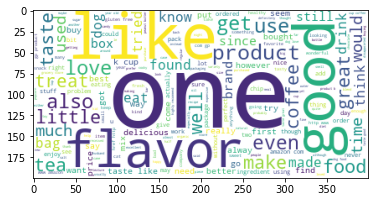

In [27]:
all_words = " ".join(df_task3['Preprocessed'])

wordcloud = WordCloud(stopwords=stop_words, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

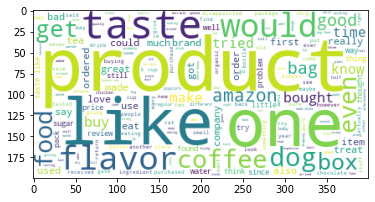

In [28]:
bad_words = " ".join(df_task3[df_task3['Score']==1].Preprocessed)
wordcloud = WordCloud(stopwords=stop_words, background_color='white')
wordcloud = wordcloud.generate(bad_words)
plt.imshow(wordcloud)

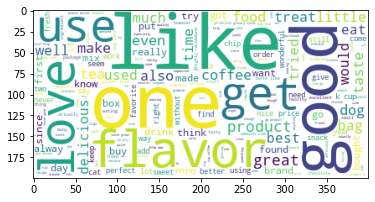

In [29]:
good_words = " ".join(df_task3[df_task3['Score']==5].Preprocessed)
wordcloud = WordCloud(stopwords=stop_words, background_color='white')
wordcloud = wordcloud.generate(good_words)
plt.imshow(wordcloud)

In [30]:
# TfidfVectorizer
x = df_task3['Preprocessed']
y = df_task3['Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

tfidfvectorizer = TfidfVectorizer(stop_words='english')
fitted = tfidfvectorizer.fit(x_train)
x_train = fitted.transform(x_train)
x_test = fitted.transform(x_test)

forest = RandomForestClassifier(n_estimators=10, max_depth=50).fit(x_train, y_train)

y_pred = forest.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.11      0.19       499
           2       0.82      0.03      0.06       307
           3       0.68      0.03      0.06       459
           4       0.49      0.04      0.08       802
           5       0.65      0.99      0.78      3499

    accuracy                           0.65      5566
   macro avg       0.68      0.24      0.24      5566
weighted avg       0.64      0.65      0.53      5566



In [31]:
#lda
vectorizer = CountVectorizer(stop_words='english')
data_vector = vectorizer.fit_transform(x)
lda = LatentDirichletAllocation(n_components = 2).fit(data_vector)

feature_names = vectorizer.get_feature_names()
num_top_words = 10

for topic_ind, topic in enumerate(lda.components_):
    print(f'topic{topic_ind}: {[feature_names[i] for i in topic.argsort()[-1: -num_top_words:-1]]}')

topic0: ['food', 'dog', 'product', 'like', 'love', 'good', 'treat', 'great', 'time']
topic1: ['coffee', 'flavor', 'taste', 'like', 'tea', 'good', 'cup', 'great', 'chip']
